# Solve Simple Constrained Optimization using Pyomo

In [4]:
%load_ext autoreload
%autoreload 2

from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/o48uhuwah8n2xww/basic_material.py?dl=0
%run basic_material

from pyomo.environ import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Python: 3.8.12


## Example 1: Min NL ftn given NL Constraint
$$
\left(\frac{x}{a}\right)^2 + \left(\frac{y}{b}\right)^2 \leq 1
$$

In [5]:
# Ellipse Constraint Params 
a = 1
b = 2

In [6]:
# Form Problem statement

# create a model instance
m2 = ConcreteModel()

# create the decision variable
m2.x = Var(domain=NonNegativeReals)
m2.y = Var(domain=NonNegativeReals)

# Constraint Eq
m2.cons = Constraint(rule = (m2.x/a)**2 + (m2.y/b)**2 - 1 <= 0 ) # 

# Create the objective
m2.area = Objective(expr=m2.x*m2.y, sense=maximize)

#m2.pprint()
# solve using the nonlinear solver ipopt
SolverFactory('ipopt').solve(m2)

print(f'Nonlinear sol x = {m2.x():.4f} and y = {m2.y():.4f}')
print(f'Max area = {m2.area():.4f}')
print(f'Constraint Margin = {m2.cons():.4f}')

Nonlinear sol x = 0.7071 and y = 1.4142
Max area = 1.0000
Constraint Margin = 0.0000


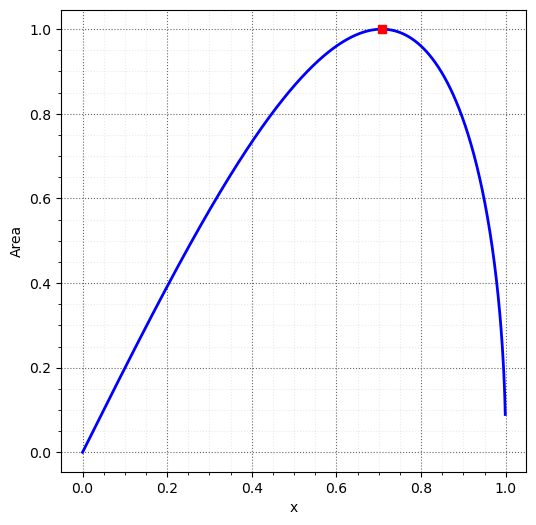

In [8]:
# Plot constrained area ftn and show that max achieved
X = np.arange(0,a,0.001)
Area = X*np.sqrt(1-(X/a)**2)*b

fig = plt.figure(2,figsize=(6,6))
ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan = 1)
ax1.set_ylim([0,1.25*a*b/2])
ax1.set_xlim([0,a])
ax1.axis('equal')

ax1.plot(X,Area,'b-')
ax1.plot(m2.x(),m2.area(),'rs')
ax1.set_xlabel('x')
ax1.set_ylabel('Area')
nicegrid()

## Example 2: Equality Constraint

In [9]:
model2 = ConcreteModel()
model2.dual = Suffix(direction=Suffix.IMPORT)

# declare decision variables
model2.x = Var(domain=Reals)
model2.y = Var(domain=Reals)

# declare objective
model2.obj = Objective(expr = model2.x+model2.y, sense = maximize)

# declare constraints
model2.constraint = Constraint(expr = (model2.x/a)**2 + (model2.y/b)**2 == 1)

# solve
SolverFactory('ipopt').solve(model2).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.4\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03610706329345703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Nonlinear sol x = 0.4472 and y = 1.7889


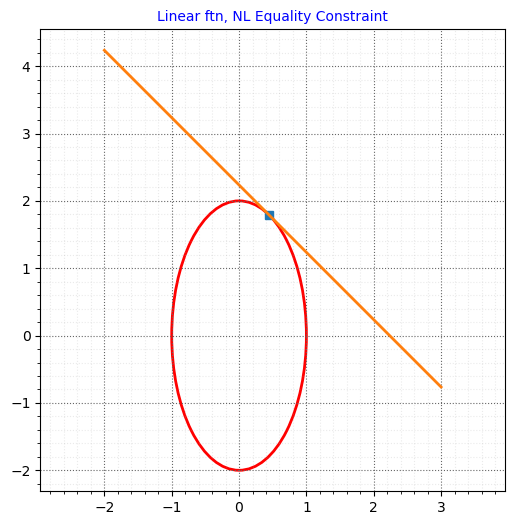

In [11]:
print(f'Nonlinear sol x = {model2.x():.4f} and y = {model2.y():.4f}')

from matplotlib.patches import Ellipse

fig = plt.figure(2,figsize=(6,6))
ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan = 1)
Range = 1.5*b
ax1.set_ylim([-Range,Range])
ax1.set_xlim([-Range,Range])
ax1.axis('equal')

ellipse = Ellipse(xy=(0,0), width=2*a, height=2*b, 
                        edgecolor='r', fc='none', lw=2)
plt.gca().add_patch(ellipse)
plt.plot(model2.x(),model2.y(),'s')

xx = np.arange(-b,2*b)
c=model2.x()+model2.y() # find constant for eq
plt.plot(xx,c-xx)
nicegrid()
plt.title('Linear ftn, NL Equality Constraint')
plt.show()

## Example3: Min NL ftn given Linear Constraint

In [12]:
model3 = ConcreteModel()
model3.dual = Suffix(direction=Suffix.IMPORT)

# declare decision variables
model3.x = Var(domain=Reals)
model3.y = Var(domain=Reals)

# declare constr
model3.constraint = Constraint(expr = model3.x+model3.y >= 3)

# declare obj
model3.obj = Objective(expr = (model3.x/a)**2 + (model3.y/b)**2, sense = minimize)

# solve
SolverFactory('ipopt').solve(model3).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.4\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03537607192993164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Nonlinear sol x = 0.6000 and y = 2.4000


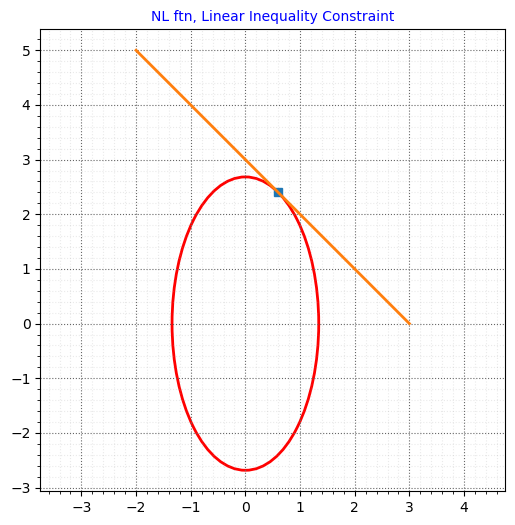

In [13]:
print(f'Nonlinear sol x = {model3.x():.4f} and y = {model3.y():.4f}')

fig = plt.figure(3,figsize=(6,6))
ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan = 1)
Range = 2*b
ax1.set_ylim([-Range,Range])
ax1.set_xlim([-Range,Range])
ax1.axis('equal')

c = (model3.x()/a)**2  + (model3.y()/b)**2 # find constant 
ellipse = Ellipse(xy=(0,0), width=sqrt(c)*2*a, height=sqrt(c)*2*b, 
                        edgecolor='r', fc='none', lw=2)
plt.gca().add_patch(ellipse)
plt.plot(model3.x(),model3.y(),'s')

xx = np.arange(-b,2*b)
plt.plot(xx,3-xx)
nicegrid()
plt.title('NL ftn, Linear Inequality Constraint')
plt.show()